In [1]:
# 02: Sample Code for EMSST V1.1
#
# Summation of NUM over global region
#  with time seires plot
# 
# Tomita and Hihara (2019)
#------------------------------------------------------------------------------------
import pandas as pd
import netCDF4
import numpy as np
import datetime

In [2]:
matplotlib inline

In [3]:
# input
#
#  year: four digit year (ex. 2018)

year=2018

In [4]:
#  read variables from netCDF

## open netCDF
file='EMSST_V1.1_DAILY_'+str(year)+'.nc'
ncf = netCDF4.Dataset(file, 'r')

## ret. varaible
num = ncf.variables['NUM'][:]

## ret. axis variable
time = ncf.variables['time'][:]
time.size

365

In [5]:
# make time stamp
## 1. define base date
since_date_str='1800-01-01'

## 2. convert time to datetime format
since_date=datetime.datetime.strptime(since_date_str,'%Y-%m-%d')

## 3. define time as difference from the base date
day_from_since_day=time[0]
nday=time.size

## 4. make time stamp
time_date=[]
nd=0
while nd <= nday-1:
  d = since_date + datetime.timedelta(days=int(day_from_since_day)+nd)
  time_date.append(d)
  nd +=1

In [6]:
#  Sum / Average of num over global region
num_sum = np.ma.sum(num,axis=(1,2))
num_ave = np.ma.average(num,axis=(1,2))

In [7]:
# make DataFrame
df = pd.DataFrame(num_sum,columns=['num @sum'])
df['date'] = time_date
df = df.set_index('date')

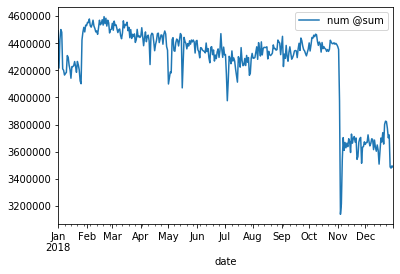

In [8]:
# plot num data as a time-seires
df.plot()